In [2]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
from collections import defaultdict
import csv
from scipy.io import loadmat
from scipy.signal import find_peaks

In [3]:
## load jaw motion data
jaw = []
file_path_1 = '/vol/cortex/cd1/Analysis/lyndsay/M136/2024-10-16/full/behavior/jaw_pixel_intensity.csv'
with open(file_path_1) as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        jaw.append(row[1])
jaw = jaw[1::]
jaw = np.array(jaw, dtype=float)

bg = []
file_path_2 = '/vol/cortex/cd1/Analysis/lyndsay/M136/2024-10-16/full/behavior/background_pixel_intensity.csv'
with open(file_path_2) as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        bg.append(row[1])
bg = bg[1::]
bg = np.array(bg, dtype=float)

In [4]:
# fit background to jaw data
fit_coeff = np.polyfit(bg, jaw, 1);
rescaled_bg = fit_coeff[0] * bg + fit_coeff[1];

# subtract fitted background from jaw
jaw_final = jaw - rescaled_bg

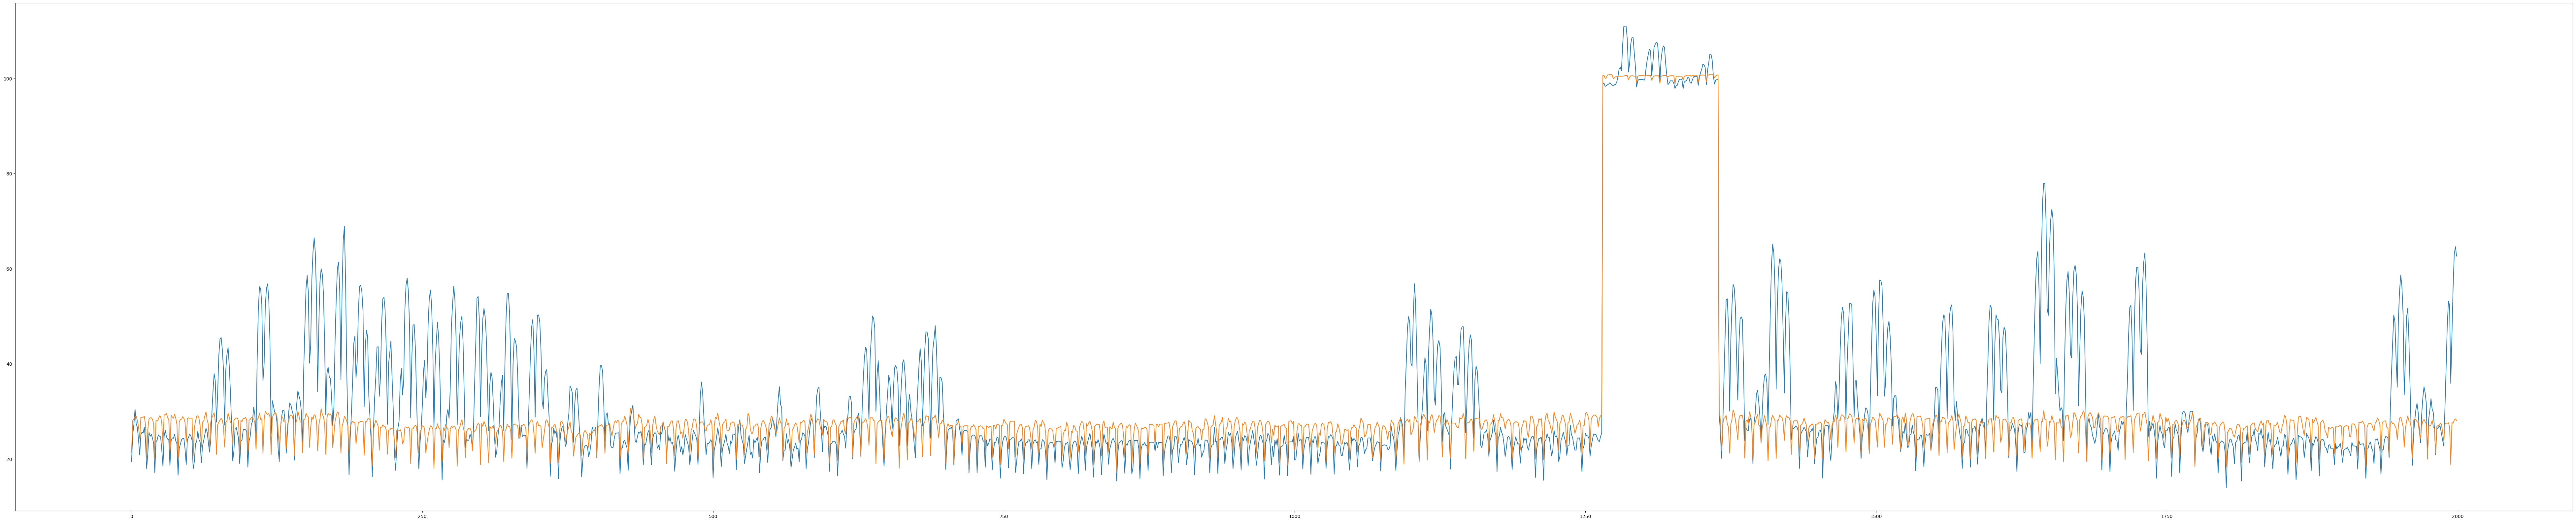

In [5]:
plt.figure(figsize=(100,20))
plt.plot(jaw[60000:62000])
plt.plot(bg[60000:62000])
plt.show()

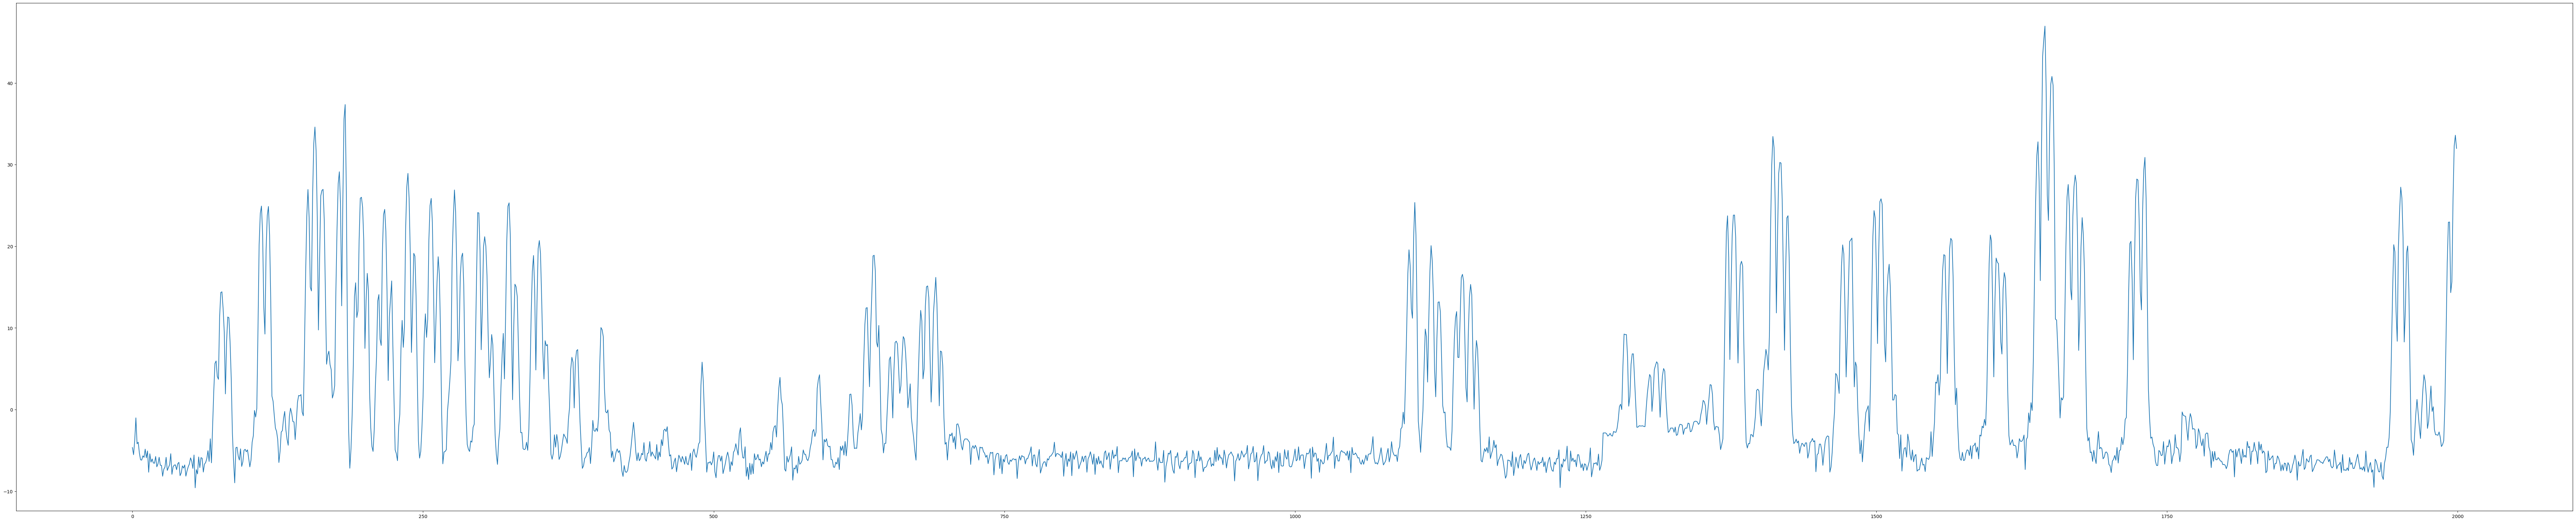

In [6]:
plt.figure(figsize=(100,20))
plt.plot(jaw_final[60000:62000])
plt.show()

In [7]:
np.savetxt('/vol/cortex/cd1/Analysis/lyndsay/M136/2024-10-16/full/behavior/corrected_jaw.txt', jaw_final, delimiter=',')

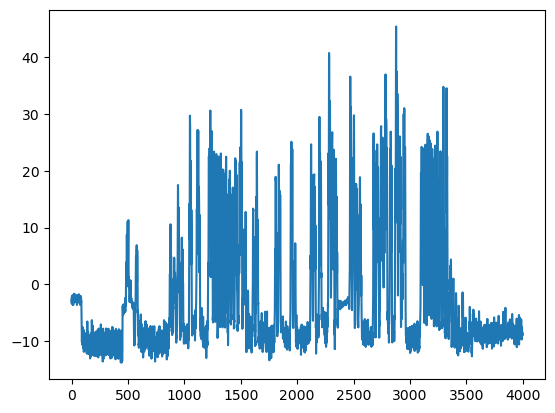

In [9]:
plt.plot(jaw_final[2000:6000])